# P0 - Estadísticas del corpus
# En este notebook vamos a analizar el corpus tiny_cc_news.txt
# y calcular estadísticas de frecuencia, riqueza léxica, n-gramas y la Ley de Zipf.


In [11]:
import matplotlib.pyplot as plt
from collections import Counter
import re


In [12]:
# 1. Obtener los tokens del corpus
with open("tiny_cc_news.txt", "r", encoding="utf-8") as f:
    documentos = f.readlines()

tokens_por_doc = [re.findall(r"\w+", doc.lower()) for doc in documentos]
tokens = [tok for doc in tokens_por_doc for tok in doc]

len(tokens), len(documentos)


(41568, 1555)

In [13]:
# 2. Leer stopwords
with open("stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set(f.read().split())

len(stopwords)


198

In [14]:
# 3. Frecuencias de tokens y tokens sin stopwords
freq_tokens = Counter(tokens)
tokens_no_stop = [t for t in tokens if t not in stopwords]
freq_tokens_no_stop = Counter(tokens_no_stop)

freq_tokens.most_common(5), freq_tokens_no_stop.most_common(5)


([('the', 2368), ('to', 1031), ('and', 986), ('a', 968), ('of', 907)],
 [('said', 154), ('new', 118), ('one', 98), ('year', 89), ('chair', 88)])

In [15]:
# 4. Estadísticas básicas del corpus
num_docs = len(documentos)
num_tokens = len(tokens)
num_stopwords = sum(1 for t in tokens if t in stopwords)
num_tokens_no_stop = len(tokens_no_stop)
prop_stopwords = num_stopwords / num_tokens if num_tokens > 0 else 0

vocab = set(tokens)
vocab_no_stop = set(tokens_no_stop)

doc_lengths = [len(doc) for doc in tokens_por_doc]
token_lengths = [len(t) for t in tokens]
token_lengths_no_stop = [len(t) for t in tokens_no_stop]

print("Número de documentos:", num_docs)
print("Número de tokens:", num_tokens)
print("Número de stopwords:", num_stopwords)
print("Número de tokens sin stopwords:", num_tokens_no_stop)
print("Proporción de stopwords:", round(prop_stopwords, 3))
print("Tamaño del vocabulario:", len(vocab))
print("Tamaño del vocabulario sin stopwords:", len(vocab_no_stop))
print("Longitud media de documento:", sum(doc_lengths)/len(doc_lengths))
print("Longitud mínima/máxima de documento:", min(doc_lengths), "/", max(doc_lengths))
print("Longitud media de token:", sum(token_lengths)/len(token_lengths))
print("Longitud mínima/máxima de token:", min(token_lengths), "/", max(token_lengths))
print("Longitud media de tokens sin stopwords:", sum(token_lengths_no_stop)/len(token_lengths_no_stop))
print("Longitud mínima/máxima de tokens sin stopwords:", min(token_lengths_no_stop), "/", max(token_lengths_no_stop))


Número de documentos: 1555
Número de tokens: 41568
Número de stopwords: 16829
Número de tokens sin stopwords: 24739
Proporción de stopwords: 0.405
Tamaño del vocabulario: 7638
Tamaño del vocabulario sin stopwords: 7499
Longitud media de documento: 26.731832797427654
Longitud mínima/máxima de documento: 0 / 456
Longitud media de token: 4.69878271747498
Longitud mínima/máxima de token: 1 / 35
Longitud media de tokens sin stopwords: 6.015036986135252
Longitud mínima/máxima de tokens sin stopwords: 1 / 35


In [16]:
# 5. Riqueza léxica
ttr = len(vocab) / num_tokens
hapax = sum(1 for t, c in freq_tokens.items() if c == 1)

print("Type-Token Ratio (TTR):", round(ttr, 3))
print("Número de hapax legomena:", hapax)


Type-Token Ratio (TTR): 0.184
Número de hapax legomena: 3936


In [17]:
# 6. Tokens más frecuentes
print("Top 10 tokens más frecuentes:")
print(freq_tokens.most_common(10))

print("\nTop 10 tokens más frecuentes (sin stopwords):")
print(freq_tokens_no_stop.most_common(10))


Top 10 tokens más frecuentes:
[('the', 2368), ('to', 1031), ('and', 986), ('a', 968), ('of', 907), ('in', 812), ('s', 501), ('for', 440), ('on', 376), ('that', 370)]

Top 10 tokens más frecuentes (sin stopwords):
[('said', 154), ('new', 118), ('one', 98), ('year', 89), ('chair', 88), ('also', 76), ('two', 74), ('back', 72), ('first', 68), ('time', 68)]


In [18]:
# 7. Bigramas y trigramas
def ngrams(lista, n=2):
    return [" ".join(lista[i:i+n]) for i in range(len(lista)-n+1)]

bigrams = Counter(ngrams(tokens, 2))
trigrams = Counter(ngrams(tokens, 3))

bigrams_no_stop = Counter(ngrams(tokens_no_stop, 2))
trigrams_no_stop = Counter(ngrams(tokens_no_stop, 3))

print("Top 10 bigramas:", bigrams.most_common(10))
print("\nTop 10 trigramas:", trigrams.most_common(10))
print("\nTop 10 bigramas (sin stopwords):", bigrams_no_stop.most_common(10))
print("\nTop 10 trigramas (sin stopwords):", trigrams_no_stop.most_common(10))


Top 10 bigramas: [('of the', 245), ('in the', 211), ('to the', 116), ('on the', 97), ('for the', 71), ('at the', 69), ('in a', 66), ('to be', 65), ('with the', 63), ('it s', 60)]

Top 10 trigramas: [('new york city', 24), ('one of the', 18), ('a pipe bomb', 18), ('according to the', 12), ('the new york', 12), ('in new york', 12), ('the associated press', 11), ('pipe bomb strapped', 11), ('bomb strapped to', 11), ('some of the', 10)]

Top 10 bigramas (sin stopwords): [('new york', 48), ('pipe bomb', 27), ('york city', 24), ('shampoo chair', 24), ('year old', 21), ('law enforcement', 19), ('eastern lightning', 17), ('times square', 16), ('years ago', 14), ('white house', 14)]

Top 10 trigramas (sin stopwords): [('new york city', 24), ('york city subway', 14), ('pipe bomb strapped', 11), ('morning rush hour', 10), ('condition anonymity authorized', 10), ('anonymity authorized speak', 10), ('law enforcement officials', 9), ('pipe bomb explosion', 9), ('inspired islamic state', 8), ('near t

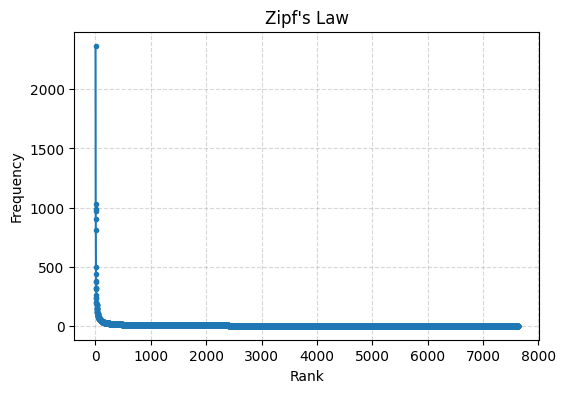

In [19]:
# 8. Ley de Zipf
sorted_freqs = sorted(freq_tokens.values(), reverse=True)
ranks = range(1, len(sorted_freqs) + 1)

plt.figure(figsize=(6, 4))
plt.plot(ranks, sorted_freqs, marker=".", linestyle="solid")
plt.title("Zipf's Law")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
